# Project 8: Chetima & Terence 

In [ ]:
#Exporting the necessary packages.
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl

## Part 1 Chetima:

In [5]:
#Here I am reading the file I requested from youtube.
my_history = pd.read_csv("watch-history2.csv")
my_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19971 entries, 0 to 19970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   header              19971 non-null  object
 1   title               19971 non-null  object
 2   titleUrl            19547 non-null  object
 3   description         2737 non-null   object
 4   time                19971 non-null  object
 5   products/0          19971 non-null  object
 6   details/0/name      2967 non-null   object
 7   activityControls/0  19971 non-null  object
 8   activityControls/1  2863 non-null   object
 9   activityControls/2  2863 non-null   object
 10  subtitles/0/name    15974 non-null  object
 11  subtitles/0/url     15974 non-null  object
dtypes: object(12)
memory usage: 1.8+ MB


In [5]:
#Exporting my timestamps into a new dataframe.
df_time = my_history.time

In [6]:
df_time


0        2023-04-19T22:04:48.331Z
1        2023-04-19T21:59:00.004Z
2        2023-04-19T21:58:37.669Z
3        2023-04-19T21:58:25.254Z
4        2023-04-19T03:35:12.207Z
                   ...           
19966    2019-04-10T12:00:53.076Z
19967    2019-04-09T21:34:21.036Z
19968    2019-04-07T21:27:52.689Z
19969    2019-04-07T21:18:22.625Z
19970    2019-04-07T12:30:57.931Z
Name: time, Length: 19971, dtype: object

In [7]:
# I am exporting my dataframe only containing the timestamps to a new csv file.
df_time.to_csv("timestamp.csv")

# Chetima Part 2:

In [6]:
#Reading the data I got from my partner.
terence = pd.read_csv("terence-data.csv")

The data was downloaded with the column number and date/timestamp in the same column, so I had to separate the two using excel for better analysis.

In [7]:
terence

,",",endTime
0,0,6/6/2022 10:39
1,1,6/6/2022 10:43
2,2,6/6/2022 10:46
3,3,6/6/2022 10:49
4,4,6/6/2022 10:52
...,...,...
9994,9994,9/8/2022 7:25
9995,9995,9/8/2022 7:30
9996,9996,9/8/2022 7:33
9997,9997,9/8/2022 7:36


In [8]:
#I want to delete the column number that came with the data because pandas automatically provides one, and it would not look good to have to column numbers columns.
#https://www.geeksforgeeks.org/delete-a-column-from-a-pandas-dataframe/
del terence[","]

In [9]:
terence

,endTime
0,6/6/2022 10:39
1,6/6/2022 10:43
2,6/6/2022 10:46
3,6/6/2022 10:49
4,6/6/2022 10:52
...,...
9994,9/8/2022 7:25
9995,9/8/2022 7:30
9996,9/8/2022 7:33
9997,9/8/2022 7:36


### Part 2.1: 

In [10]:
#Here I am transforming the data into a datetime format.
terence["date_time"] = pd.to_datetime(terence["endTime"], errors = "coerce")

In [11]:
terence

,endTime,date_time
0,6/6/2022 10:39,2022-06-06 10:39:00
1,6/6/2022 10:43,2022-06-06 10:43:00
2,6/6/2022 10:46,2022-06-06 10:46:00
3,6/6/2022 10:49,2022-06-06 10:49:00
4,6/6/2022 10:52,2022-06-06 10:52:00
...,...,...
9994,9/8/2022 7:25,2022-09-08 07:25:00
9995,9/8/2022 7:30,2022-09-08 07:30:00
9996,9/8/2022 7:33,2022-09-08 07:33:00
9997,9/8/2022 7:36,2022-09-08 07:36:00


### Part 2.2: 

In [12]:
# Now, I am calculating the difference between the timestamp and a following timestamp. 
terence["time_difference"] = terence["date_time"].diff()

In [13]:
terence

,endTime,date_time,time_difference
0,6/6/2022 10:39,2022-06-06 10:39:00,NaT
1,6/6/2022 10:43,2022-06-06 10:43:00,0 days 00:04:00
2,6/6/2022 10:46,2022-06-06 10:46:00,0 days 00:03:00
3,6/6/2022 10:49,2022-06-06 10:49:00,0 days 00:03:00
4,6/6/2022 10:52,2022-06-06 10:52:00,0 days 00:03:00
...,...,...,...
9994,9/8/2022 7:25,2022-09-08 07:25:00,0 days 00:04:00
9995,9/8/2022 7:30,2022-09-08 07:30:00,0 days 00:05:00
9996,9/8/2022 7:33,2022-09-08 07:33:00,0 days 00:03:00
9997,9/8/2022 7:36,2022-09-08 07:36:00,0 days 00:03:00


### Part 2.3: 

Calculating the maximum and average time between timestamps.

In [14]:
terence["time_difference"].max()

Timedelta('2 days 15:27:00')

In [15]:
terence["time_difference"].mean()

Timedelta('0 days 00:13:31.053526763')

    The maximum time between timestamps is 2 days 15 hours and 27 minutes. 
    The average time between timestamps is 13 minutes and roughly 31 seconds.

### Part 2.4: 

In [43]:
#Creating a new column with only the day from the timestamp concerned. 
terence['days'] = pd.DatetimeIndex(terence['date_time']).day 

In [ ]:
#Creating a new column with only the month from the timestamp concerned. 
terence['month'] = pd.DatetimeIndex(terence['date_time']).month

In [49]:
#Creating a new column with only the day and month from the timestamp concerned. 
#https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra
terence['days_&_months'] = terence['month'].astype(str) + '-' + terence['days'].astype(str)

In [50]:
terence

,endTime,date_time,time_difference,days,month,days_&_months
0,6/6/2022 10:39,2022-06-06 10:39:00,NaT,6.0,6.0,6.0-6.0
1,6/6/2022 10:43,2022-06-06 10:43:00,0 days 00:04:00,6.0,6.0,6.0-6.0
2,6/6/2022 10:46,2022-06-06 10:46:00,0 days 00:03:00,6.0,6.0,6.0-6.0
3,6/6/2022 10:49,2022-06-06 10:49:00,0 days 00:03:00,6.0,6.0,6.0-6.0
4,6/6/2022 10:52,2022-06-06 10:52:00,0 days 00:03:00,6.0,6.0,6.0-6.0
...,...,...,...,...,...,...
9994,9/8/2022 7:25,2022-09-08 07:25:00,0 days 00:04:00,8.0,9.0,9.0-8.0
9995,9/8/2022 7:30,2022-09-08 07:30:00,0 days 00:05:00,8.0,9.0,9.0-8.0
9996,9/8/2022 7:33,2022-09-08 07:33:00,0 days 00:03:00,8.0,9.0,9.0-8.0
9997,9/8/2022 7:36,2022-09-08 07:36:00,0 days 00:03:00,8.0,9.0,9.0-8.0


In [52]:
#Calculating the day with the most timestamps using the days & months column.
day_counts = terence["days_&_months"].value_counts()
day_max= terence["days_&_months"].value_counts().max()
print(day_max)
print(day_counts)

318
7.0-3.0     318
8.0-24.0    233
6.0-23.0    225
7.0-21.0    221
6.0-27.0    220
           ... 
8.0-6.0      16
7.0-9.0      12
9.0-7.0      11
8.0-2.0       4
nan-nan       2
Name: days_&_months, Length: 95, dtype: int64


The day with most timestamps is July 3rd.

### Part 2.5: 

In [53]:
terence

,endTime,date_time,time_difference,days,month,days_&_months
0,6/6/2022 10:39,2022-06-06 10:39:00,NaT,6.0,6.0,6.0-6.0
1,6/6/2022 10:43,2022-06-06 10:43:00,0 days 00:04:00,6.0,6.0,6.0-6.0
2,6/6/2022 10:46,2022-06-06 10:46:00,0 days 00:03:00,6.0,6.0,6.0-6.0
3,6/6/2022 10:49,2022-06-06 10:49:00,0 days 00:03:00,6.0,6.0,6.0-6.0
4,6/6/2022 10:52,2022-06-06 10:52:00,0 days 00:03:00,6.0,6.0,6.0-6.0
...,...,...,...,...,...,...
9994,9/8/2022 7:25,2022-09-08 07:25:00,0 days 00:04:00,8.0,9.0,9.0-8.0
9995,9/8/2022 7:30,2022-09-08 07:30:00,0 days 00:05:00,8.0,9.0,9.0-8.0
9996,9/8/2022 7:33,2022-09-08 07:33:00,0 days 00:03:00,8.0,9.0,9.0-8.0
9997,9/8/2022 7:36,2022-09-08 07:36:00,0 days 00:03:00,8.0,9.0,9.0-8.0


In [54]:
#Calculating the month with the most timestamps using the months column.
month_max = terence["month"].value_counts()
max_time = terence["month"].value_counts().max()
print(month_max)
print(max_time)

7.0    3419
8.0    3037
6.0    2721
9.0     820
Name: month, dtype: int64
3419


The month with the most timestamps is July, with a total of 3419 timestamps. 

### Part 2.6: 

My partner's data is from a audio streaming service. The timestamps are short, constant and large in number for such a short period of time. An audio streaming service consumer is more likely to share the same data characteristics.

### Part 2.7: 

My partner has indeed correctly guessed where I requested my data from, Youtube. His analysis looked good too.

### Part 2.8:


March 2022 most coincided withe spring break, I most likely took that opportunity to relax and do what I could not do during school time

### Part 2.9: 

Terence's data was indeed requested from spotify. I think that for college students, being hyper active on apps like spotify is not uncommon, in fact I can arguably say that it is the norm. As for myself, I knew that I spent a lot of time on Youtube, but after Terence's analysis I really think that I should my best try to invest my time in some other beneficial areas too.  

# Terence Part 2 

In [61]:
chetima = pd.read_csv("timestamp.csv")
chetima.head(5)

,Unnamed: 0,time
0,0,2023-04-19T22:04:48.331Z
1,1,2023-04-19T21:59:00.004Z
2,2,2023-04-19T21:58:37.669Z
3,3,2023-04-19T21:58:25.254Z
4,4,2023-04-19T03:35:12.207Z


In [62]:
chetima = chetima.sort_values(by='time', ascending = True)
chetima.head(10)

,Unnamed: 0,time
19970,19970,2019-04-07T12:30:57.931Z
19969,19969,2019-04-07T21:18:22.625Z
19968,19968,2019-04-07T21:27:52.689Z
19967,19967,2019-04-09T21:34:21.036Z
19966,19966,2019-04-10T12:00:53.076Z
19965,19965,2019-04-13T16:03:42.789Z
19964,19964,2019-04-13T22:26:12.348Z
19963,19963,2019-04-13T22:27:07.778Z
19962,19962,2019-04-13T22:30:38.591Z
19961,19961,2019-04-13T22:35:46.208Z


In [63]:
chetima.drop(columns = "Unnamed: 0", inplace = True)

In [64]:
chetima.head(5)

,time
19970,2019-04-07T12:30:57.931Z
19969,2019-04-07T21:18:22.625Z
19968,2019-04-07T21:27:52.689Z
19967,2019-04-09T21:34:21.036Z
19966,2019-04-10T12:00:53.076Z


In [65]:
chetima.time = pd.to_datetime(chetima.time, errors="ignore")

In [66]:
chetima.head(5)

,time
19970,2019-04-07 12:30:57.931000+00:00
19969,2019-04-07 21:18:22.625000+00:00
19968,2019-04-07 21:27:52.689000+00:00
19967,2019-04-09 21:34:21.036000+00:00
19966,2019-04-10 12:00:53.076000+00:00


In [67]:
chetima["time_delta"] = chetima.time.diff()

In [68]:
chetima.head(5)

,time,time_delta
19970,2019-04-07 12:30:57.931000+00:00,NaT
19969,2019-04-07 21:18:22.625000+00:00,0 days 08:47:24.694000
19968,2019-04-07 21:27:52.689000+00:00,0 days 00:09:30.064000
19967,2019-04-09 21:34:21.036000+00:00,2 days 00:06:28.347000
19966,2019-04-10 12:00:53.076000+00:00,0 days 14:26:32.040000


In [69]:
chetima.time_delta.describe()

count                        19970
mean     0 days 01:46:14.643485227
std      0 days 08:49:36.550994119
min         0 days 00:00:00.139000
25%         0 days 00:01:10.652750
50%         0 days 00:04:45.097000
75%         0 days 00:20:33.384750
max        15 days 00:34:23.244000
Name: time_delta, dtype: object

### Part 2.3:


The longest time between timestamps is roughly 15 days and the average is 1 hr 46 mins and 14 secs.

In [70]:
# Because the data is accross three years, I had to index using both year and dayofyear so that I could an accurate 
#count of the day with the most timestamps. First I get the year with the most timestamps and then I get the day
# with the most time stamps in that year. 
chetima["day"] = chetima.time.dt.dayofyear
chetima["year"] = chetima.time.dt.year

In [71]:
chetima.head(10)

,time,time_delta,day,year
19970,2019-04-07 12:30:57.931000+00:00,NaT,97,2019
19969,2019-04-07 21:18:22.625000+00:00,0 days 08:47:24.694000,97,2019
19968,2019-04-07 21:27:52.689000+00:00,0 days 00:09:30.064000,97,2019
19967,2019-04-09 21:34:21.036000+00:00,2 days 00:06:28.347000,99,2019
19966,2019-04-10 12:00:53.076000+00:00,0 days 14:26:32.040000,100,2019
19965,2019-04-13 16:03:42.789000+00:00,3 days 04:02:49.713000,103,2019
19964,2019-04-13 22:26:12.348000+00:00,0 days 06:22:29.559000,103,2019
19963,2019-04-13 22:27:07.778000+00:00,0 days 00:00:55.430000,103,2019
19962,2019-04-13 22:30:38.591000+00:00,0 days 00:03:30.813000,103,2019
19961,2019-04-13 22:35:46.208000+00:00,0 days 00:05:07.617000,103,2019


In [72]:
chetima.year.value_counts()

2022    7930
2023    4808
2019    2818
2021    2640
2020    1775
Name: year, dtype: int64

In [73]:
year_2022 = chetima[chetima.year == 2022]
year_2022.head(10)

,time,time_delta,day,year
12737,2022-01-01 00:02:44.622000+00:00,0 days 00:18:41.056000,1,2022
12736,2022-01-01 01:56:10.539000+00:00,0 days 01:53:25.917000,1,2022
12735,2022-01-01 02:04:08.698000+00:00,0 days 00:07:58.159000,1,2022
12734,2022-01-01 02:05:59.573000+00:00,0 days 00:01:50.875000,1,2022
12733,2022-01-01 05:47:40.521000+00:00,0 days 03:41:40.948000,1,2022
12732,2022-01-01 05:48:23.328000+00:00,0 days 00:00:42.807000,1,2022
12731,2022-01-01 05:48:24.203000+00:00,0 days 00:00:00.875000,1,2022
12730,2022-01-01 05:48:25.871000+00:00,0 days 00:00:01.668000,1,2022
12729,2022-01-01 05:48:56.486000+00:00,0 days 00:00:30.615000,1,2022
12728,2022-01-01 05:49:32.942000+00:00,0 days 00:00:36.456000,1,2022


In [74]:
year_2022.day.value_counts()

362    74
87     72
365    66
67     65
128    64
       ..
165     2
224     2
244     1
247     1
233     1
Name: day, Length: 349, dtype: int64

In [75]:
year_2022[year_2022.day == 74].head(5)

,time,time_delta,day,year
10770,2022-03-15 00:19:13.287000+00:00,0 days 01:49:12.705000,74,2022
10769,2022-03-15 00:54:29.270000+00:00,0 days 00:35:15.983000,74,2022
10768,2022-03-15 01:00:37.962000+00:00,0 days 00:06:08.692000,74,2022
10767,2022-03-15 02:51:27.411000+00:00,0 days 01:50:49.449000,74,2022
10766,2022-03-15 02:52:21.392000+00:00,0 days 00:00:53.981000,74,2022


### Part 2.4: 

In [76]:
The 15th of March 2022 had the most timestamps.

SyntaxError: invalid syntax (3049643515.py, line 1)

In [77]:
year_2022["month"] = year_2022.time.dt.month

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_36232\539652368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022["month"] = year_2022.time.dt.month


In [78]:
year_2022.month.value_counts()

3     1032
4      914
5      894
2      854
12     741
10     735
1      621
11     567
7      454
8      436
6      357
9      325
Name: month, dtype: int64

### Part 2.5:


The month of March in 2022 had 1032 timestamps which is the most in all three years

### Part 2.6

Based on the average time between each timestamp which is almost 2 hrs I think thes source of this data is a video streaming platform like youtube or netflix. Also the day/month with the most time stamps coincides with spring break in 2022 which makes me think its probably netflix or a similar service becuase its common to catch up on tv shows over holiday breaks.

### Part 2.7: 

### Part 2.8:

I think havng precise location data would be help me figure out what else was going on during the time period with the most tine stamps

### Part 2.9:

The actual source for Chetima's data was youtube so my analysis was almost accurate and one thing I learnt was that we both spend a lot of time on youtube in our free time. Working with my own data made me realize that for better or worse I listen to music a lot.

## Part 3:

In [ ]:
#We are plotting the number of timestamp per month in the 2022 for both our datas.
# 2022 because Terence has only his data from certain months of that year.

In [79]:
Chetima_22 = pd.read_csv("Chetima_22.csv")

In [81]:
terence.to_csv("terence_22.csv")

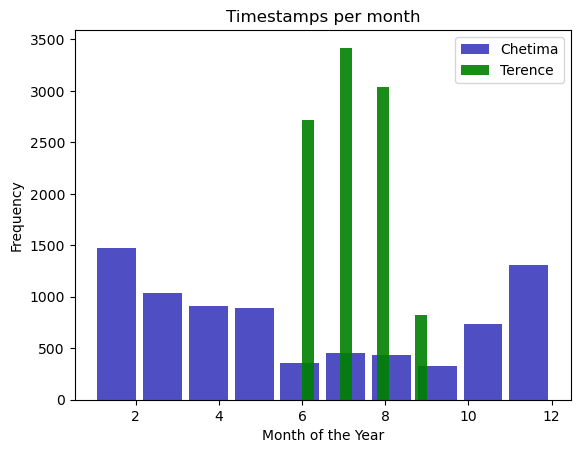

In [114]:
plt.hist(Chetima_22.month, bins = 10, color = "#0504aa", alpha = 0.7, rwidth = 0.85, label= 'Chetima' )
plt.hist(terence.month, bins = 10, color = "green", alpha = 0.9, rwidth = 0.95, label= 'Terence')
plt.xlabel("Month of the Year")
plt.ylabel("Frequency")
plt.title("Timestamps per month")
plt.legend()
plt.show()

It looks like Terrence has more timestamps than Chetima, meaning that he listen to much more content than me over the time period in which he was active on spotify. But Chetima listen to longer content timewise. 

# Chetima Part 4

In [24]:
my_history["time"] = pd.to_datetime(my_history["time"], errors = "coerce")


In [25]:
my_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19971 entries, 0 to 19970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   header              19971 non-null  object             
 1   title               19971 non-null  object             
 2   titleUrl            19547 non-null  object             
 3   description         2737 non-null   object             
 4   time                19971 non-null  datetime64[ns, UTC]
 5   products/0          19971 non-null  object             
 6   details/0/name      2967 non-null   object             
 7   activityControls/0  19971 non-null  object             
 8   activityControls/1  2863 non-null   object             
 9   activityControls/2  2863 non-null   object             
 10  subtitles/0/name    15974 non-null  object             
 11  subtitles/0/url     15974 non-null  object             
dtypes: datetime64[ns, UTC](1), objec

### Did I really watch 19971 videos on youtube?

Some of the videos I watched on youtube were not actually videos I watched. A plethora of them were advertisement videos that poppeed up while I was watching something or maybe even right before I the videos I intended to watch were played. 

In [26]:
# Youtube ads were recorded in my data as "Des annonces Google", So I am creating a new dataframe withouth them.
my_actual_history = my_history[my_history["details/0/name"] != "Des annonces Google"]
#music[music.day == 88].Time.iloc[1]

In [27]:
my_actual_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17004 entries, 1 to 19970
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   header              17004 non-null  object             
 1   title               17004 non-null  object             
 2   titleUrl            16580 non-null  object             
 3   description         1 non-null      object             
 4   time                17004 non-null  datetime64[ns, UTC]
 5   products/0          17004 non-null  object             
 6   details/0/name      0 non-null      object             
 7   activityControls/0  17004 non-null  object             
 8   activityControls/1  0 non-null      object             
 9   activityControls/2  0 non-null      object             
 10  subtitles/0/name    15974 non-null  object             
 11  subtitles/0/url     15974 non-null  object             
dtypes: datetime64[ns, UTC](1), objec

The 2967 are for sure youtube ads or announcements . I watched an important number of the 17004 videos in my home country, where advertisments on youtube are not accessible, thus the number of ads I was forced to watch could largely exceed the 2967. Additionaly, 2967 is only the number of ads/announcements that was recorded by Youtube, many other ads I watched were probably not recorded as ads by youtube. 

### In which fraction of the day was I more frequent on Youtube?

In [31]:
Chetima_22 = pd.read_csv("Chetima_22.csv")
Chetima_22

,Column1,time,time_delta,day,year,month
0,12737,12/31/2021 16:02,0 days 00:18:41.056000,1,2022,1
1,12736,12/31/2021 17:56,0 days 01:53:25.917000,1,2022,1
2,12735,12/31/2021 18:04,0 days 00:07:58.159000,1,2022,1
3,12734,12/31/2021 18:06,0 days 00:01:50.875000,1,2022,1
4,12733,12/31/2021 21:47,0 days 03:41:40.948000,1,2022,1
...,...,...,...,...,...,...
7925,4812,12/31/2022 15:29,0 days 00:00:06.953000,365,2022,12
7926,4811,12/31/2022 15:32,0 days 00:02:53.237000,365,2022,12
7927,4810,12/31/2022 15:34,0 days 00:01:35.655000,365,2022,12
7928,4809,12/31/2022 15:37,0 days 00:02:46.727000,365,2022,12


In [32]:
#Youtube recorded my data with as UTC, which is closer to time zone in my country, Niger(UTC +1).
#I am choosimg to work with the videos I watched while I was at home, from June to December 2022.

videos = Chetima_22[Chetima_22.month >= 6]

In [33]:
videos

,Column1,time,time_delta,day,year,month
4315,8422,6/1/2022 7:11,1 days 21:32:54.636000,152,2022,6
4316,8421,6/1/2022 7:17,0 days 00:05:52.173000,152,2022,6
4317,8420,6/1/2022 7:19,0 days 00:02:44.585000,152,2022,6
4318,8419,6/1/2022 7:22,0 days 00:02:40.405000,152,2022,6
4319,8418,6/1/2022 9:20,0 days 01:57:37.087000,152,2022,6
...,...,...,...,...,...,...
7925,4812,12/31/2022 15:29,0 days 00:00:06.953000,365,2022,12
7926,4811,12/31/2022 15:32,0 days 00:02:53.237000,365,2022,12
7927,4810,12/31/2022 15:34,0 days 00:01:35.655000,365,2022,12
7928,4809,12/31/2022 15:37,0 days 00:02:46.727000,365,2022,12


In [ ]:
#I am choosing a range of June to November as these are the full month I spent at home in 2022.

In [34]:
videos['hours'] = pd.DatetimeIndex(videos['time']).hour
videos['minutes'] = pd.DatetimeIndex(videos['time']).minute
videos = videos[videos.month <= 11]

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_36232\3796418453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['hours'] = pd.DatetimeIndex(videos['time']).hour
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_36232\3796418453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['minutes'] = pd.DatetimeIndex(videos['time']).minute


In [35]:
videos

,Column1,time,time_delta,day,year,month,hours,minutes
4315,8422,6/1/2022 7:11,1 days 21:32:54.636000,152,2022,6,7,11
4316,8421,6/1/2022 7:17,0 days 00:05:52.173000,152,2022,6,7,17
4317,8420,6/1/2022 7:19,0 days 00:02:44.585000,152,2022,6,7,19
4318,8419,6/1/2022 7:22,0 days 00:02:40.405000,152,2022,6,7,22
4319,8418,6/1/2022 9:20,0 days 01:57:37.087000,152,2022,6,9,20
...,...,...,...,...,...,...,...,...
7184,5553,11/29/2022 23:31,0 days 00:15:35.276000,334,2022,11,23,31
7185,5552,11/29/2022 23:39,0 days 00:07:57.951000,334,2022,11,23,39
7186,5551,11/30/2022 5:33,0 days 05:54:05.618000,334,2022,11,5,33
7187,5550,11/30/2022 5:34,0 days 00:00:23.918000,334,2022,11,5,34


In [ ]:
#Next, I am ploting the number of timestamp per hour.

In [39]:
#http://localhost:8888/notebooks/CS%20215/Individual%20Projects%20Chetima/Project%203%20Chetima.ipynb
hours_count = videos.hours.value_counts()

<AxesSubplot:>

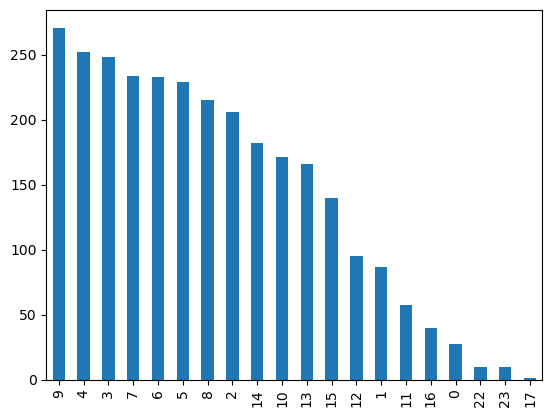

In [40]:
hours_count[hours_count >= 0].plot(kind= 'bar')

I apparently was more frequent on Youtube around 9AM UTC which is 10AM Nigerien time.

# Terence Part 4 

Questions:

  1. Which month had the most listening time? Do I remember what might have been happening?
  
  2. Is there a recurring time of the month that I listened to music the most? Or maybe week of the month?

In [96]:
music = pd.read_csv("terence_spot.csv")

In [97]:
music.head(20)

,Column1,Time,seconds,day,year,month
0,0,3/21/2022 2:15,0.000,80,2022,3
1,1,3/21/2022 2:15,4.810,80,2022,3
2,2,3/21/2022 2:19,196.013,80,2022,3
3,3,3/21/2022 2:23,257.253,80,2022,3
4,4,3/21/2022 2:24,45.465,80,2022,3
5,5,3/21/2022 2:24,10.837,80,2022,3
6,6,3/21/2022 2:28,202.666,80,2022,3
7,7,3/21/2022 2:32,121.651,80,2022,3
8,9,3/21/2022 2:33,11.915,80,2022,3
9,8,3/21/2022 2:33,2.495,80,2022,3


In [99]:
music.drop(columns = "Column1", inplace = True)

In [100]:
music.head(5)

,Time,seconds,day,year,month
0,3/21/2022 2:15,0.000,80,2022,3
1,3/21/2022 2:15,4.810,80,2022,3
2,3/21/2022 2:19,196.013,80,2022,3
3,3/21/2022 2:23,257.253,80,2022,3
4,3/21/2022 2:24,45.465,80,2022,3


In [101]:
videos[videos.hours == 4].iloc[3]
              
#music[music.day == 88].Time.iloc[1]              

Column1                         8287
time                  6/12/2022 4:58
time_delta    0 days 00:11:47.589000
day                              163
year                            2022
month                              6
hours                              4
minutes                           58
Name: 4450, dtype: object

In [102]:
music.day.value_counts()

88     304
91     269
138    245
86     226
87     219
      ... 
145     46
140     43
129     32
155     22
85      18
Name: day, Length: 77, dtype: int64

In [103]:
days = music.day.value_counts().rename_axis('Days').reset_index(name='Count')
days.head(5)

,Days,Count
0,88,304
1,91,269
2,138,245
3,86,226
4,87,219


In [104]:
music[music.day == 88].Time.iloc[1]

'3/29/2022 0:10'

In [105]:
#getting the months of the year corresponding to the days with highest number of songs played
#The months will be used to label the bar chart. 
dayMonth = []
for i in range(10):
    timestamp = music[music.day == days.Days.iloc[i]].Time.iloc[1]
    month = pd.Timestamp(timestamp)
    dayMonth.append((days.Days.iloc[i], month.month_name()))
dayMonth


[(88, 'March'),
 (91, 'April'),
 (138, 'May'),
 (86, 'March'),
 (87, 'March'),
 (80, 'March'),
 (81, 'March'),
 (108, 'April'),
 (115, 'April'),
 (105, 'April')]

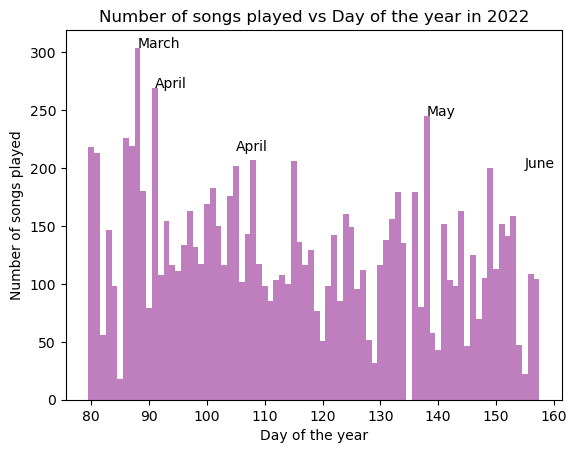

In [106]:
plt.bar(days.Days, height = days.Count, width = 1, color = "purple", alpha = 0.5)
plt.title("Number of songs played vs Day of the year in 2022")
plt.xlabel("Day of the year")
plt.ylabel("Number of songs played")
plt.text(88, 304, "March")
plt.text(91, 269, "April")
plt.text(138, 245, "May")
plt.text(105, 215, "April")
plt.text(155, 200, "June")
plt.show()

Between Feb and July in 2022 my music engagement peaked in March and I am not quite sure why that is. Probaly because of the spring break. I had more time on my hands to explore new genres and in April my engagement decreased of which I suspect was due to the increasing school workload. I don't do well with listening to music and studying at the same time. That said, my engagement should have increased in June because summer had begun.